# Initial sphere CA from ChatGPT, just pasted 

Can you extend that code to apply on the surface of a sphere? 

ChatGPT:
Certainly! To extend the code to apply on the surface of a sphere, we can use a spherical coordinate system and modify the initialization and evolution of the grid accordingly. Here's an updated version of the code:

In this modified code, the initialize_grid function generates a random initial grid on the surface of a sphere using spherical coordinates. The evolve function updates the grid in a similar manner as before, using the provided probability kernel.

The visualization is done using matplotlib's 3D plotting capabilities. The update function evolves the grid and updates the surface plot accordingly.

You can adjust the theta_res, phi_res, initial_density, and kernel variables to customize the model according to your needs. The frames parameter in animation.FuncAnimation controls the number of frames in the animation, and the interval parameter controls the delay between frames in milliseconds.

Feel free to modify the code further to experiment with different probability kernels or visualization settings on the surface of a sphere.


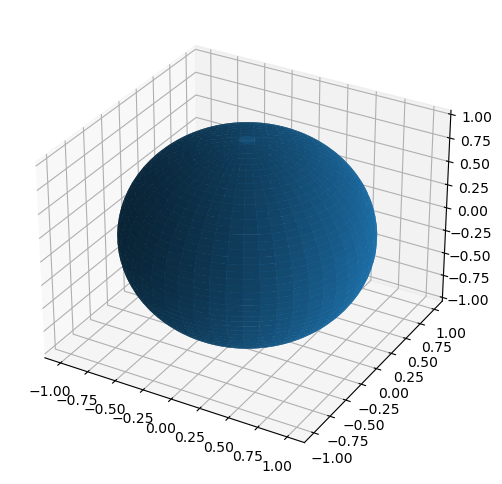

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def initialize_grid(theta_res, phi_res, initial_density):
   theta = np.linspace(0, 2 * np.pi, theta_res)
   phi = np.linspace(0, np.pi, phi_res)
   grid = np.random.choice([0, 1], size=(phi_res, theta_res), p=[1 - initial_density, initial_density])
   return grid, theta, phi


def evolve(grid, kernel):
   phi_res, theta_res = grid.shape
   new_grid = np.zeros_like(grid)

   for i in range(phi_res):
       for j in range(theta_res):
           if grid[i, j] == 0:
               new_grid[i, j] = int(np.random.random() < kernel[i, j])
           else:
               new_grid[i, j] = 1

   return new_grid


def update(frame):
   global grid
   grid = evolve(grid, kernel)
   img.set_array(grid)
   return img,


# Configuration
theta_res = 100
phi_res = 50
initial_density = 0.3
kernel = np.ones((phi_res, theta_res)) * 0.25  # Example kernel where each neighbor has equal probability

# Initialize grid and animation
grid, theta, phi = initialize_grid(theta_res, phi_res, initial_density)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
X = np.outer(np.sin(phi), np.cos(theta))
Y = np.outer(np.sin(phi), np.sin(theta))
Z = np.outer(np.cos(phi), np.ones_like(theta)) 
img = ax.plot_surface(X, Y, Z) #, linewidth=0.2, facecolors='white', edgecolors='black', )
#ax.set_axis_off()
#ani = animation.FuncAnimation(fig, update, frames=200, interval=100, blit=True)

plt.show()


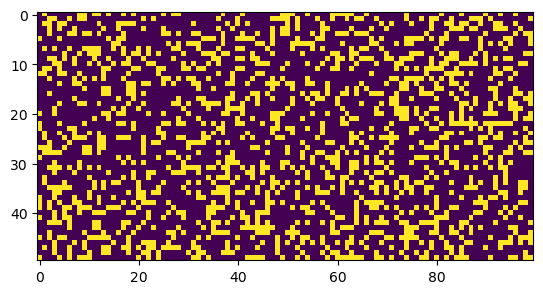

In [35]:
# Oh it is just on a lat-lon grid
plt.imshow(grid)

## Would have to add grid to radius-1 sphere in X,Y,Z 